In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Loading data

In [81]:
data_df = pd.read_csv("data_alexithymia2.csv", sep=";")
df = data_df.iloc[:, 3:-1]

### Rescaling

In [83]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)
scaled_df = scaler.fit_transform(df)

### Fitting PCA instance

In [84]:
pca_inst = PCA()
pca_inst.fit(scaled_df)
scores = pca_inst.transform(scaled_df)

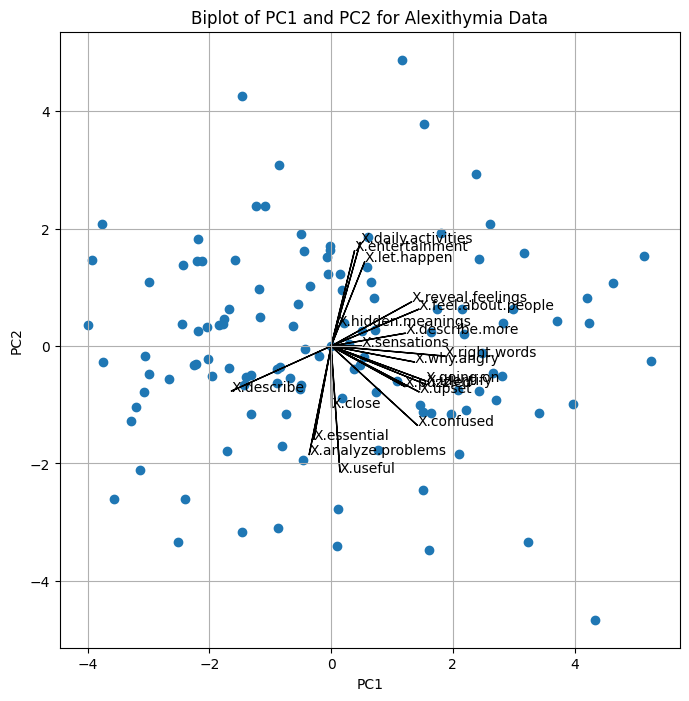

In [85]:
i = 0
j = 1
arrow_scaler = 5
pca_inst.components_[1] *= -1
fig, ax = plt.subplots(1, 1,
                       figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pca_inst.components_.shape[1]):
    ax.arrow(0, 0, 
             arrow_scaler * pca_inst.components_[i,k], 
             arrow_scaler * pca_inst.components_[j,k])
    ax.text(arrow_scaler * pca_inst.components_[i,k],
            arrow_scaler * pca_inst.components_[j,k],
            df.columns[k])
    
ax.grid()
ax.set_title("Biplot of PC1 and PC2 for Alexithymia Data")
fig.set_facecolor('w')
fig.savefig('pc_biplot.png')

Text(0.5, 1.0, 'Proportion Explained Variance by Component')

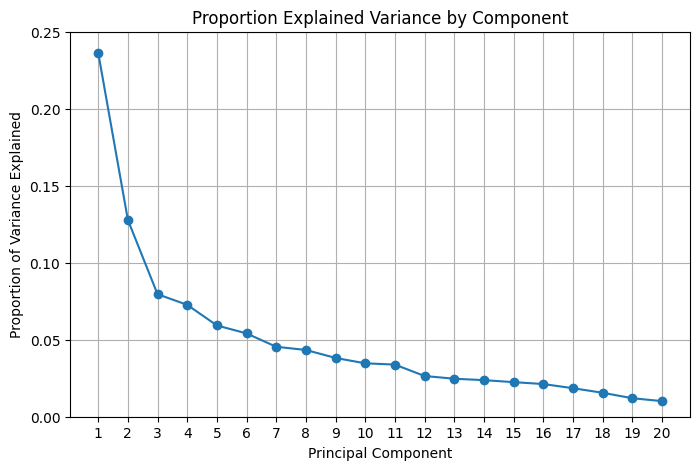

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ticks = np.arange(pca_inst.n_components_)+1
ax.plot(ticks,
        pca_inst.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,0.25])
ax.set_xticks(ticks)
ax.grid()
ax.set_title("Proportion Explained Variance by Component")

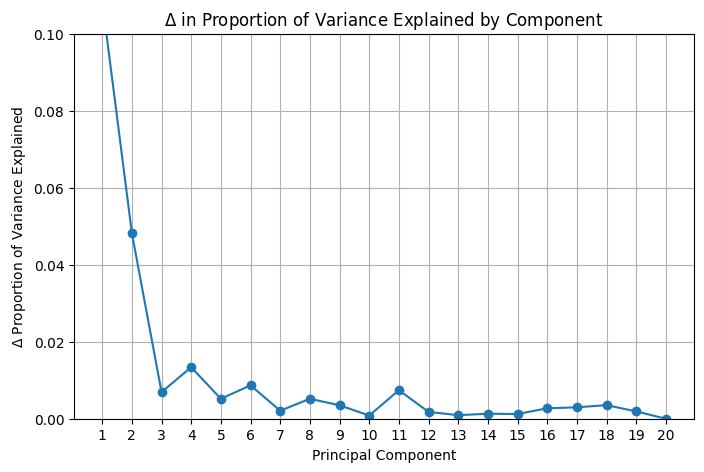

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ticks = np.arange(pca_inst.n_components_)+1
pca_comp_delta = abs(np.diff(pca_inst.explained_variance_ratio_))
pca_comp_delta_adj = np.append(pca_comp_delta, [0])
ax.plot(ticks,
        pca_comp_delta_adj,
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('$\Delta$ Proportion of Variance Explained')
ax.set_ylim([0,0.1])
ax.set_xticks(ticks)
ax.grid()
ax.set_title("$\Delta$ in Proportion of Variance Explained by Component")
fig.set_facecolor('w')
fig.savefig('pc_var_delta.png')

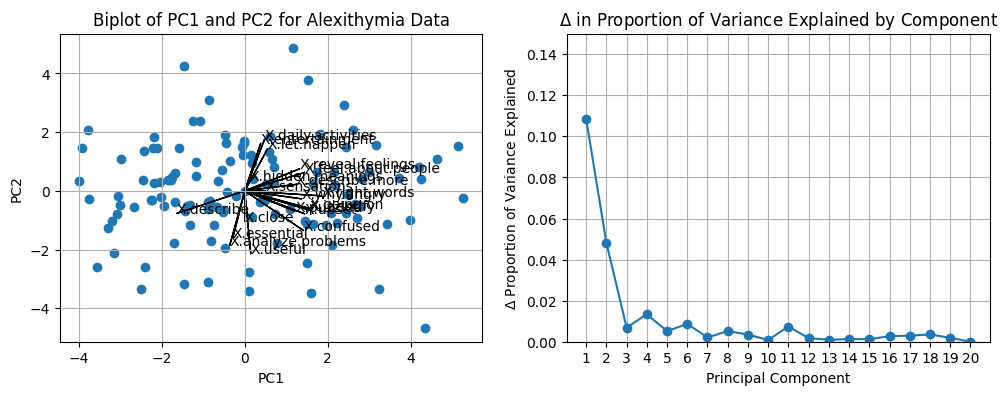

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ticks = np.arange(pca_inst.n_components_)+1
pca_comp_delta = abs(np.diff(pca_inst.explained_variance_ratio_))
pca_comp_delta_adj = np.append(pca_comp_delta, [0])

axs[0].scatter(scores[:,0], scores[:,1])
axs[0].set_xlabel('PC%d' % (i+1))
axs[0].set_ylabel('PC%d' % (j+1))
for k in range(pca_inst.components_.shape[1]):
    axs[0].arrow(0, 0,
                 arrow_scaler * pca_inst.components_[i,k], 
                 arrow_scaler * pca_inst.components_[j,k])
    axs[0].text(arrow_scaler * pca_inst.components_[i,k],
                arrow_scaler * pca_inst.components_[j,k],
                df.columns[k])
    
axs[0].grid()
axs[0].set_title("Biplot of PC1 and PC2 for Alexithymia Data")

axs[1].plot(ticks,
        pca_comp_delta_adj,
        marker='o')
axs[1].set_xlabel('Principal Component')
axs[1].set_ylabel('$\Delta$ Proportion of Variance Explained')
axs[1].set_ylim([0,0.15])
axs[1].set_xticks(ticks)
axs[1].grid()
axs[1].set_title("$\Delta$ in Proportion of Variance Explained by Component")
fig.set_facecolor('w')
fig.savefig('pc_multi_plot.png')

In [95]:
sum(pca_inst.explained_variance_ratio_[:3])

0.44367980643229277